In [1]:
import sys

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import librosa
import librosa.display
import IPython.display as display

sys.path.append('../src')
import const
from metrics import row_wise_micro_averaged_f1_score

pd.options.display.max_rows=120

In [2]:
def fill_dropped(dropped_array, drop_idx):
    filled_array = np.zeros(
        (len(dropped_array) + len(drop_idx), dropped_array.shape[1])
    )
    idx_array = np.arange(len(filled_array))
    use_idx = np.delete(idx_array, drop_idx)
    filled_array[use_idx, :] = dropped_array
    return filled_array

In [3]:
def extract_label(preds, th=0.5):
    events = preds >= th
    nocall_col = np.zeros((len(preds), 1)).astype(bool)
    nocall_col[events.sum(1) == 0] = True
    events = np.concatenate([events, nocall_col], axis=1)
    
    predict_labels = []
    for i in range(len(events)):
        event = events[i, :]
        labels = np.argwhere(event).reshape(-1).tolist()
        
        row_labels = []
        for label in labels:
            row_labels.append(const.INV_BIRD_CODE[label])
        predict_labels.append(" ".join(row_labels))

    return predict_labels

In [4]:
def plot_oof(idx):
    plt.figure(figsize=(16, 5))
    plt.plot(oof[idx, :])

In [5]:
valid_df = pd.read_csv('../data/input/train_soundscape_labels.csv')
use_idx = valid_df[~valid_df["audio_id"].isin([7019, 7954, 14473])].index
drop_idx = valid_df[valid_df["audio_id"].isin([7019, 7954, 14473])].index
valid_df = valid_df.iloc[use_idx].reset_index(drop=True)

val_y_labels = valid_df["birds"].tolist()

In [6]:
oof4 = np.load("../logs/exp_004_20210409202215_0.701/oof.npy")
oof10 = np.load("../logs/exp_010_20210412203406_0.684/oof.npy")
oof11 = np.load("../logs/exp_011_20210413092718_0.710/oof.npy")
oof12 = np.load("../logs/exp_012_20210413202510_0.700/oof.npy")
oof20 = np.load("../logs/exp_020_20210420203023_0.698/oof.npy")
oof21 = np.load("../logs/exp_021_20210421105635_0.701/oof.npy")
oof22 = np.load("../logs/exp_022_20210421213519_0.712/oof.npy")
oof23 = np.load("../logs/exp_023_20210422072541_0.696/oof.npy")
oof24 = np.load("../logs/exp_024_20210422215622_0.684/oof.npy")
oof25 = np.load("../logs/exp_025_20210423142123_0.684/oof.npy")
oof28 = np.load("../logs/exp_028_20210425165254_0.671/oof.npy")
oof28 = np.load("../logs/exp_028_20210425165254_0.671/oof.npy")
# oof29 = np.load("../logs/exp_029_20210425212038_0.675/oof.npy")
# oof32 = np.load("../logs/exp_032_20210426185313_0.684/oof.npy")
# oof33 = np.load("../logs/exp_033_20210426230524_0.701/oof.npy")
# oof34 = np.load("../logs/exp_034_20210427025324_0.686/oof.npy")
# oof35 = np.load("../logs/exp_035_20210427085305_0.690/oof.npy")

oof40 = np.load("../logs/exp_040_20210428095746_0.696/oof.npy")
oof41 = np.load("../logs/exp_041_20210428173715_0.689/oof.npy")
oof42 = np.load("../logs/exp_042_20210429120526_0.692/oof.npy")
oof43 = np.load("../logs/exp_043_20210429195623_0.697/oof.npy")
oof44 = np.load("../logs/exp_044_20210429235301_0.707/oof.npy")
oof45 = np.load("../logs/exp_045_20210430131333_0.695/oof.npy")
oof50 = np.load("../logs/exp_050_20210502230529_0.679/oof.npy")
oof51 = np.load("../logs/exp_051_20210503030848_0.694/oof.npy")
oof52 = np.load("../logs/exp_052_20210503093904_0.692/oof.npy")

oof54 = np.load("../logs/exp_054_20210503234704_0.685/oof.npy")
oof55 = np.load("../logs/exp_055_20210504024705_0.693/oof.npy")
oof55 = oof54 * 0.5 + oof55 * 0.5

oof56 = np.load("../logs/exp_056_20210504114210_0.697/oof.npy")
oof57 = np.load("../logs/exp_057_20210504153605_0.690/oof.npy")
oof60 = np.load("../logs/exp_060_20210505181921_0.706/oof.npy")
oof61 = np.load("../logs/exp_061_20210505232548_0.656/oof.npy")
oof62 = np.load("../logs/exp_062_20210506032156_0.648/oof.npy")
oof65 = np.load("../logs/exp_065_20210507102634_0.640/oof.npy")
oof65 = fill_dropped(oof65, drop_idx)
oof66 = np.load("../logs/exp_066_20210507141914_0.637/oof.npy")
oof66 = fill_dropped(oof66, drop_idx)
oof67 = np.load("../logs/exp_067_20210507230447_0.629/oof.npy")
oof68 = np.load("../logs/exp_068_20210508025654_0.620/oof.npy")
oof74 = np.load("../logs/exp_074_20210509223155_3.172/oof.npy")
oof74 = fill_dropped(oof74, drop_idx)
oof76 = np.load("../logs/exp_076_20210511000515_0.629/oof.npy")
oof76 = fill_dropped(oof76, drop_idx)
oof77 = np.load("../logs/exp_077_20210511035734_0.629/oof.npy")
oof77 = fill_dropped(oof77, drop_idx)
oof78 = np.load("../logs/exp_078_20210511074917_0.633/oof.npy")
oof78 = fill_dropped(oof78, drop_idx)
oof81 = np.load("../logs/exp_081_20210511225340_0.636/oof.npy")
oof81 = fill_dropped(oof81, drop_idx)
oof82 = np.load("../logs/exp_082_20210512024531_0.625/oof.npy")
oof82 = fill_dropped(oof82, drop_idx)

# nocall classification
oof59 = np.load("../logs/exp_059_20210505100513_0.666/oof.npy")
oof70 = np.load("../logs/exp_070_20210508193023_0.882/oof.npy")
oof79 = np.load("../logs/exp_079_20210511132329_0.874/oof.npy")
oof83 = np.load("../logs/exp_083_20210512081958_0.827/oof.npy")
oof99 = np.load("../logs/exp_099_20210515202257_0.859/oof.npy")

In [7]:
def shift(df, pred_labels, freq):
    shift_labels = [None] * len(df)

    gp = df.groupby("audio_id")
    for audio_id, audio_df in gp:
        idxs = audio_df.index.values
        audio_shift_labels = np.roll(pred_labels[idxs[0]: idxs[-1] + 1], freq)
        
        if freq > 0:
            audio_shift_labels[:freq] = "None"
        elif freq < 0:
            audio_shift_labels[freq:] = "None"
            
        shift_labels[idxs[0]: idxs[-1] + 1] = audio_shift_labels

    return shift_labels


def intersect(labels_list1, labels_list2):
    intersect_list = []
    for idx in range(len(labels_list1)):
        lables1 = labels_list1[idx].split(" ")
        lables2 = labels_list2[idx].split(" ")
        
        intersect = np.intersect1d(lables1, lables2)
        if len(intersect) == 0:
            intersect = ["nocall"]
        intersect_list.append(" ".join(list(intersect)))
        
    return intersect_list


def add_label(labels_list1, labels_list2):
    added_labels_list = []
    for labels1, labels2 in zip(labels_list1, labels_list2):

        if labels1 == "nocall":
            if labels2 == "nocall":
                added_labels_list.append("nocall")
            else:
                added_labels_list.append(labels2)
        
        else:
            if labels2 == "nocall":
                added_labels_list.append(labels1)
            else:
                added_labels = list(set((labels1 + " " + labels2).split(" ")))
                added_labels_list.append(" ".join(added_labels))
    
    return added_labels_list


def post_process_v8(preds, pred_labels, df, window_size=1):
    confident_labels = [const.INV_BIRD_CODE[bc] for bc in np.argsort(preds)[:, -1]]

    final_labels_list = pred_labels.copy()
    for w in range(window_size):
        for freq in [w + 1, -(w + 1)]:
            shift_labels = shift(df, pred_labels, freq)
            shift_intersect_labels = intersect(confident_labels, shift_labels)
            final_labels_list = add_label(final_labels_list, shift_intersect_labels)
        
    return final_labels_list


def post_process_v2_plus(preds, df, c=2, q=0.99, w=1.5):
    post_preds = preds.copy()
    
    gp = df.groupby("audio_id")
    for audio_id, audio_df in gp:
        idxs = audio_df.index.values
        site = audio_df.loc[idxs[0], "site"]
        
        audio_preds = preds[idxs, :]
        audio_preds_mean = np.mean(audio_preds, axis=0)
        audio_preds_mean_ = audio_preds_mean / audio_preds_mean.max()
        quantile = np.quantile(audio_preds_mean_, q)

        for bc in np.argsort(audio_preds_mean_)[::-1]:
            v = audio_preds_mean_[bc]
            if v >= (quantile * c):
                for idx in idxs:
                    if np.argmax(post_preds[idx, :]) == bc:
                        post_preds[idx, bc] *= w
            else:
                break

    return post_preds

In [8]:
concat_oof = np.concatenate([
    oof4[np.newaxis, :, :],
    oof10[np.newaxis, :, :],
    oof11[np.newaxis, :, :],
    oof12[np.newaxis, :, :],
    oof44[np.newaxis, :, :],
    oof45[np.newaxis, :, :],
    oof51[np.newaxis, :, :],
    oof76[np.newaxis, :, :],
    oof77[np.newaxis, :, :],
], axis=0)

oof = np.mean(concat_oof, axis=0)[use_idx, :]
post_oof = post_process_v2_plus(oof, valid_df, c=2.0, q=0.99, w=2.0)

In [9]:
oof_labels = extract_label(oof, th=0.27)
post_oof_labels = post_process_v8(post_oof, oof_labels, valid_df, window_size=2)

In [10]:
score = row_wise_micro_averaged_f1_score(val_y_labels, oof_labels)
score

0.7082026143790825

In [11]:
valid_df["oof_birds"] = oof_labels
valid_df["oof_birds_post"] = post_oof_labels

oof_argsort_array = np.argsort(oof, axis=1)[:, ::-1]

valid_df["first_label"] = oof_argsort_array[:, 0]
valid_df["second_label"] = oof_argsort_array[:, 1]
valid_df["third_label"] = oof_argsort_array[:, 2]

valid_df["first_label"] = valid_df["first_label"].apply(lambda x: const.INV_BIRD_CODE[x])
valid_df["second_label"] = valid_df["second_label"].apply(lambda x: const.INV_BIRD_CODE[x])
valid_df["third_label"] = valid_df["third_label"].apply(lambda x: const.INV_BIRD_CODE[x])

In [12]:
valid_df["nocall_birds"] = 0
valid_df.loc[valid_df[valid_df["birds"] == "nocall"].index, "nocall_birds"] = 1

valid_df["nocall_oof_birds"] = 0
valid_df.loc[valid_df[valid_df["oof_birds"] == "nocall"].index, "nocall_oof_birds"] = 1

In [13]:
valid_df["acc"] = valid_df["birds"] == valid_df["oof_birds"]
valid_df.head()

,row_id,site,audio_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,nocall_birds,nocall_oof_birds,acc
0,11254_COR_5,COR,11254,5,rubwre1,nocall,nocall,wbwwre1,rubwre1,burwar1,0,1,False
1,11254_COR_10,COR,11254,10,nocall,nocall,nocall,wbwwre1,rewbla,gbwwre1,1,1,True
2,11254_COR_15,COR,11254,15,rubwre1,rubwre1,rubwre1,rubwre1,wbwwre1,orbeup1,0,0,True
3,11254_COR_20,COR,11254,20,nocall,nocall,nocall,scamac1,meapar,grbher3,1,1,True
4,11254_COR_25,COR,11254,25,rubwre1,rubwre1,rubwre1,rubwre1,wbwwre1,gbwwre1,0,0,True


In [14]:
valid_df["diff"] = (valid_df["birds"].apply(lambda x: 1 if x == "nocall" else 0) - 
                                 valid_df["oof_birds"].apply(lambda x: 1 if x == "nocall" else 0))
valid_df["diff_pattern"] = valid_df["diff"].map({-1: "bird -> nocall", 0: "birdX -> birdY", 1: "nocall -> bird"})
valid_df["birdcall_p"] = oof79.reshape(-1)

In [15]:
valid_df["diff_pattern"].value_counts()

birdX -> birdY    1524
bird -> nocall     504
nocall -> bird      12
Name: diff_pattern, dtype: int64

何かしらの鳥の鳴き声が聞こえているのに `nocall`と予測しているパターンが多い

In [16]:
valid_df[~valid_df["acc"]]

,row_id,site,audio_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,nocall_birds,nocall_oof_birds,acc,diff,diff_pattern,birdcall_p
0,11254_COR_5,COR,11254,5,rubwre1,nocall,nocall,wbwwre1,rubwre1,burwar1,0,1,False,-1,bird -> nocall,1.000000
30,11254_COR_155,COR,11254,155,obnthr1,nocall,obnthr1,obnthr1,butsal1,gbwwre1,0,1,False,-1,bird -> nocall,0.999992
42,11254_COR_215,COR,11254,215,brnjay,nocall,nocall,brnjay,strcuc1,yebfly,0,1,False,-1,bird -> nocall,0.999987
53,11254_COR_270,COR,11254,270,brnjay,nocall,nocall,relpar,meapar,brnjay,0,1,False,-1,bird -> nocall,0.996587
54,11254_COR_275,COR,11254,275,brnjay sthwoo1,brnjay,brnjay,brnjay,chbant1,sthwoo1,0,0,False,0,birdX -> birdY,0.999995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,54955_SSW_520,SSW,54955,520,chswar,nocall,nocall,rucwar,chswar,wlswar,0,1,False,-1,bird -> nocall,0.550007
2030,54955_SSW_555,SSW,54955,555,chswar,nocall,nocall,ducfly,canwar,eursta,0,1,False,-1,bird -> nocall,0.998972
2031,54955_SSW_560,SSW,54955,560,grycat,nocall,nocall,blujay,grycat,rebnut,0,1,False,-1,bird -> nocall,0.617323
2036,54955_SSW_585,SSW,54955,585,grycat,nocall,nocall,canwar,chswar,amered,0,1,False,-1,bird -> nocall,0.419688


In [17]:
gp = valid_df.groupby("audio_id")

for audio_id, audio_df in gp:
    idxs = audio_df.index.values
    score = row_wise_micro_averaged_f1_score( valid_df.loc[idxs, "birds"].values, valid_df.loc[idxs, "oof_birds"])

    print(f"audio_id: {audio_id}\n score: {score:.4f}   nocall_mean: {1 - audio_df['birdcall_p'].mean():.4f}")
    print("-" * 50)
    print(audio_df['birds'].value_counts())
    print("\n")
    print(audio_df['oof_birds'].value_counts())
    print("\n")
    print(audio_df[~valid_df["acc"]]["diff_pattern"].value_counts())
    print("\n" * 2)

audio_id: 2782
 score: 0.2089   nocall_mean: 0.0036
--------------------------------------------------
eawpew reevir1                  37
reevir1                         23
bkcchi eawpew reevir1           20
eawpew grycat reevir1           16
grycat reevir1                   9
bkcchi reevir1                   8
bkcchi eawpew grycat reevir1     3
bkcchi grycat reevir1            2
chswar eawpew reevir1            1
chswar eawpew grycat reevir1     1
Name: birds, dtype: int64


nocall     78
grycat     14
reevir1    13
eawpew      8
gbwwre1     4
andsol1     1
obnthr1     1
chswar      1
Name: oof_birds, dtype: int64


bird -> nocall    78
birdX -> birdY    34
Name: diff_pattern, dtype: int64



audio_id: 7843
 score: 0.9833   nocall_mean: 0.7868
--------------------------------------------------
nocall    116
bkcchi      2
blujay      2
Name: birds, dtype: int64


nocall    118
blujay      2
Name: oof_birds, dtype: int64


bird -> nocall    2
Name: diff_pattern, dtype: int64



audio_id

<ipython-input-17-814b63d3dbcd>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(audio_df[~valid_df["acc"]]["diff_pattern"].value_counts())


## audio_id: 2782

In [18]:
idx = valid_df[valid_df["audio_id"] == 2782].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label", "birdcall_p"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,birdcall_p
960,2782_SSW_5,5,bkcchi grycat reevir1,grycat,grycat,grycat,gbwwre1,obnthr1,0.999999
961,2782_SSW_10,10,eawpew grycat reevir1,nocall,grycat,grycat,amerob,relpar,0.999999
962,2782_SSW_15,15,bkcchi eawpew grycat reevir1,nocall,grycat,grycat,grasal1,butsal1,1.000000
963,2782_SSW_20,20,eawpew grycat reevir1,grycat,grycat,grycat,butsal1,grasal1,0.999999
964,2782_SSW_25,25,eawpew grycat reevir1,nocall,nocall,obnthr1,grycat,gbwwre1,1.000000
965,2782_SSW_30,30,bkcchi reevir1,nocall,nocall,reevir1,gbwwre1,rucwar1,1.000000
966,2782_SSW_35,35,eawpew grycat reevir1,grycat,grycat,grycat,obnthr1,grasal1,1.000000
967,2782_SSW_40,40,bkcchi eawpew grycat reevir1,grycat,grycat,grycat,amerob,brnthr,1.000000
968,2782_SSW_45,45,eawpew reevir1,nocall,nocall,hutvir,reevir1,buhvir,0.999999
969,2782_SSW_50,50,bkcchi eawpew reevir1,nocall,nocall,scatan,yetvir,casvir,1.000000


In [19]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.3766666666666667

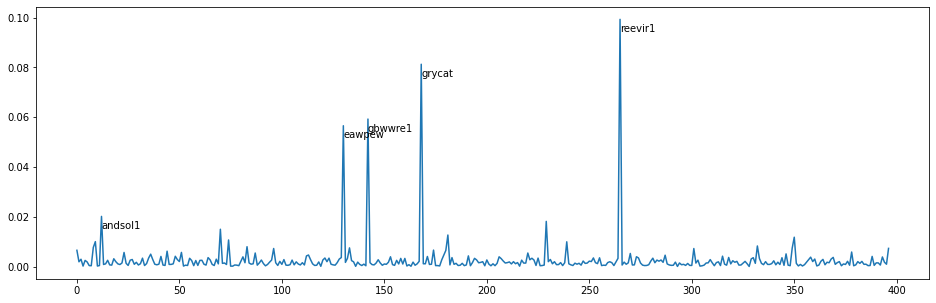

In [20]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [21]:
top5_birds

['andsol1', 'eawpew', 'gbwwre1', 'grycat', 'reevir1']

## audio_id: 7843

In [22]:
idx = valid_df[valid_df["audio_id"] == 7843].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label", "birdcall_p"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,birdcall_p
1080,7843_SSW_5,5,nocall,nocall,nocall,swathr,mallar3,comrav,0.273263
1081,7843_SSW_10,10,nocall,nocall,nocall,comrav,mallar3,eursta,0.232884
1082,7843_SSW_15,15,nocall,nocall,nocall,mallar3,comrav,eursta,0.052452
1083,7843_SSW_20,20,nocall,nocall,nocall,comrav,mallar3,bcnher,0.221026
1084,7843_SSW_25,25,nocall,nocall,nocall,mallar3,bcnher,whimbr,0.265102
1085,7843_SSW_30,30,nocall,nocall,nocall,gnwtea,whimbr,mallar3,0.090474
1086,7843_SSW_35,35,nocall,nocall,nocall,mallar3,comrav,bcnher,0.112447
1087,7843_SSW_40,40,nocall,nocall,nocall,comrav,mallar3,bcnher,0.265425
1088,7843_SSW_45,45,nocall,nocall,nocall,mallar3,comrav,whimbr,0.091866
1089,7843_SSW_50,50,nocall,nocall,nocall,mallar3,comrav,bcnher,0.097662


In [23]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.016666666666666666

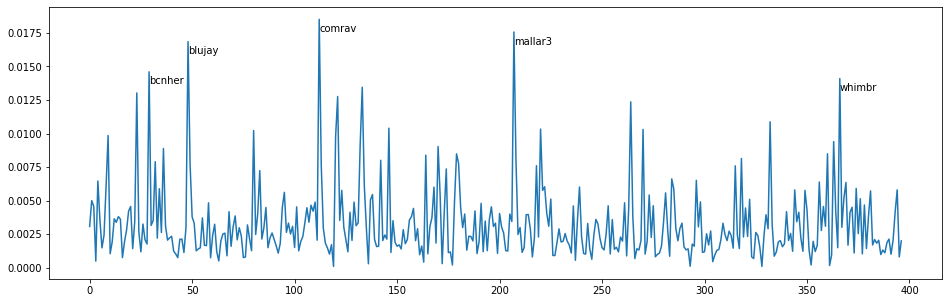

In [24]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [25]:
top5_birds

['bcnher', 'blujay', 'comrav', 'mallar3', 'whimbr']

## audio_id: 10534

In [26]:
idx = valid_df[valid_df["audio_id"] == 10534].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label", "birdcall_p"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,birdcall_p
1200,10534_SSW_5,5,nocall,nocall,nocall,mallar3,bcnher,comrav,0.062904
1201,10534_SSW_10,10,swaspa,swaspa,swaspa,swaspa,chispa,rewbla,1.000000
1202,10534_SSW_15,15,nocall,nocall,nocall,eursta,comrav,mallar3,0.468732
1203,10534_SSW_20,20,nocall,nocall,nocall,grhowl,blujay,mallar3,0.999783
1204,10534_SSW_25,25,swaspa,swaspa,swaspa,swaspa,lucwar,norwat,0.999998
1205,10534_SSW_30,30,nocall,nocall,nocall,gadwal,rewbla,mallar3,0.148773
1206,10534_SSW_35,35,nocall,nocall,nocall,eucdov,rewbla,mouchi,0.473926
1207,10534_SSW_40,40,nocall,nocall,nocall,gwfgoo,blujay,bcnher,0.529056
1208,10534_SSW_45,45,nocall,nocall,nocall,daejun,rewbla,trokin,0.094898
1209,10534_SSW_50,50,blujay,nocall,nocall,scptyr1,grnjay,comgra,0.999602


In [27]:
len(df[df["birds"] == "nocall"])

63

In [28]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.3083333333333334

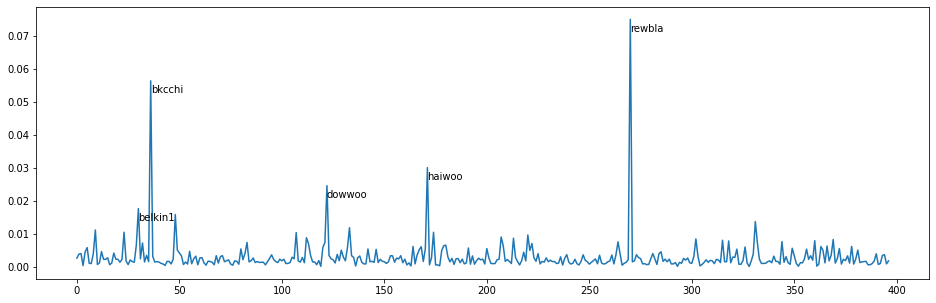

In [29]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [30]:
top5_birds

['belkin1', 'bkcchi', 'dowwoo', 'haiwoo', 'rewbla']

## audio_id: 11254

In [31]:
idx = valid_df[valid_df["audio_id"] == 11254].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label", "birdcall_p"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,birdcall_p
0,11254_COR_5,5,rubwre1,nocall,nocall,wbwwre1,rubwre1,burwar1,1.000000
1,11254_COR_10,10,nocall,nocall,nocall,wbwwre1,rewbla,gbwwre1,1.000000
2,11254_COR_15,15,rubwre1,rubwre1,rubwre1,rubwre1,wbwwre1,orbeup1,1.000000
3,11254_COR_20,20,nocall,nocall,nocall,scamac1,meapar,grbher3,0.999551
4,11254_COR_25,25,rubwre1,rubwre1,rubwre1,rubwre1,wbwwre1,gbwwre1,0.999999
5,11254_COR_30,30,nocall,nocall,nocall,goftyr1,burwar1,orbeup1,1.000000
6,11254_COR_35,35,nocall,nocall,nocall,warvir,wbwwre1,balori,0.999982
7,11254_COR_40,40,nocall,nocall,nocall,brbmot1,spotow,ocbfly1,0.855455
8,11254_COR_45,45,nocall,nocall,nocall,ruboro1,comrav,mallar3,0.453952
9,11254_COR_50,50,nocall,nocall,nocall,blhpar1,meapar,littin1,0.553085


In [32]:
len(df[df["birds"] == "nocall"])

105

In [33]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.10555555555555554

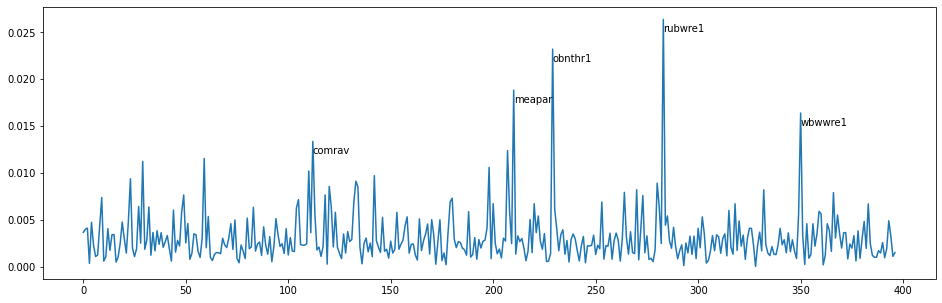

In [34]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [35]:
top5_birds

['comrav', 'meapar', 'obnthr1', 'rubwre1', 'wbwwre1']

## audio_id: 18003

In [36]:
idx = valid_df[valid_df["audio_id"] == 18003].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label", "birdcall_p"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,birdcall_p
120,18003_COR_5,5,rucwar,rucwar,rucwar,rucwar,gcrwar,magwar,0.999990
121,18003_COR_10,10,nocall,nocall,nocall,killde,marwre,belkin1,0.998695
122,18003_COR_15,15,nocall,nocall,nocall,eursta,eucdov,barswa,0.981738
123,18003_COR_20,20,rucwar,nocall,nocall,rucwar,lesvio1,grasal1,0.999964
124,18003_COR_25,25,rucwar,laufal1,laufal1,laufal1,rucwar,houwre,1.000000
125,18003_COR_30,30,rucwar,nocall,laufal1,laufal1,gcrwar,rucwar,0.999999
126,18003_COR_35,35,rucwar,nocall,nocall,rucwar,amered,naswar,0.999991
127,18003_COR_40,40,rucwar,nocall,nocall,rucwar,gcrwar,thswar1,0.999928
128,18003_COR_45,45,rucwar,nocall,nocall,gcrwar,rucwar,bawwar,0.999967
129,18003_COR_50,50,rucwar,nocall,nocall,bucmot2,rucwar,blctan1,0.999991


In [37]:
len(df[df["birds"] == "nocall"])

24

In [38]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.4444444444444449

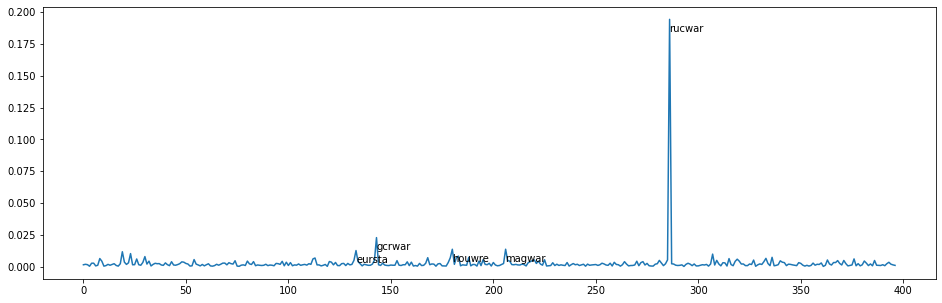

In [39]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [40]:
top5_birds

['eursta', 'gcrwar', 'houwre', 'magwar', 'rucwar']

## audio_id: 20152

In [41]:
idx = valid_df[valid_df["audio_id"] == 20152].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label", "birdcall_p"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,birdcall_p
1320,20152_SSW_5,5,nocall,nocall,nocall,bcnher,comrav,mallar3,0.014314
1321,20152_SSW_10,10,nocall,nocall,nocall,mallar3,bcnher,comrav,0.015237
1322,20152_SSW_15,15,nocall,nocall,nocall,squcuc1,whbman1,labwoo,0.019210
1323,20152_SSW_20,20,nocall,nocall,nocall,bcnher,mallar3,comrav,0.017859
1324,20152_SSW_25,25,nocall,nocall,nocall,cedwax,gockin,brncre,0.034290
1325,20152_SSW_30,30,nocall,nocall,nocall,mallar3,comrav,whimbr,0.032495
1326,20152_SSW_35,35,nocall,nocall,nocall,mallar3,whimbr,bcnher,0.052646
1327,20152_SSW_40,40,nocall,nocall,nocall,mallar3,eursta,barswa,0.035596
1328,20152_SSW_45,45,nocall,nocall,nocall,mallar3,comrav,whimbr,0.031128
1329,20152_SSW_50,50,nocall,nocall,nocall,mallar3,bcnher,whimbr,0.039663


In [42]:
len(df[df["birds"] == "nocall"])

116

In [43]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.008333333333333333

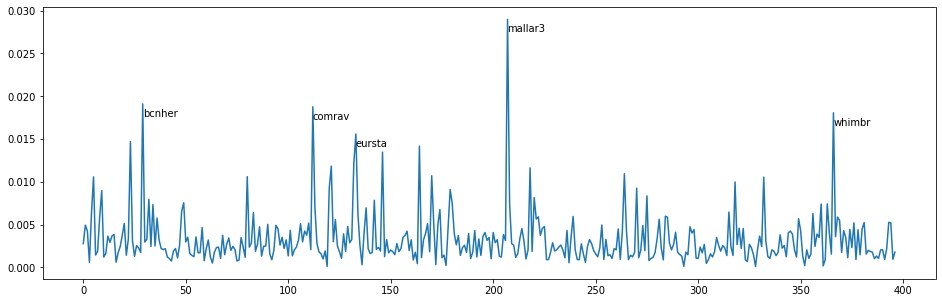

In [44]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [45]:
top5_birds

['bcnher', 'comrav', 'eursta', 'mallar3', 'whimbr']

## audio_id: 21767

In [46]:
idx = valid_df[valid_df["audio_id"] == 21767].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label", "birdcall_p"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,birdcall_p
240,21767_COR_5,5,grekis rucwar,nocall,nocall,sobtyr1,rucwar,thswar1,1.000000
241,21767_COR_10,10,grekis rucwar,nocall,nocall,grekis,buggna,bugtan,0.999991
242,21767_COR_15,15,rucwar,nocall,nocall,rucwar,grekis,thswar1,0.999991
243,21767_COR_20,20,rucwar,nocall,nocall,grekis,rucwar,gcrwar,0.999988
244,21767_COR_25,25,rucwar,nocall,nocall,fepowl,blbgra1,buggna,0.999997
245,21767_COR_30,30,grekis rucwar,rucwar,rucwar,rucwar,tenwar,thswar1,1.000000
246,21767_COR_35,35,rucwar,nocall,nocall,grekis,barswa,compot1,0.999997
247,21767_COR_40,40,grekis rucwar,nocall,nocall,lobgna5,swathr,eursta,0.999994
248,21767_COR_45,45,rucwar,nocall,nocall,rucwar,swathr,tenwar,1.000000
249,21767_COR_50,50,nocall,nocall,nocall,rucwar,cinfly2,thbeup1,0.999983


In [47]:
df["birds"].unique()

array(['grekis rucwar', 'rucwar', 'nocall', 'grekis', 'grekis runwre1',
       'clcrob rucwar', 'clcrob', 'runwre1', 'runwre1 yehcar1',
       'rucwar runwre1 yehcar1', 'melbla1', 'crfpar', 'crfpar rucwar',
       'rucwar runwre1', 'hofwoo1 rucwar', 'rucwar whcpar', 'whcpar',
       'hofwoo1 whcpar', 'hofwoo1', 'crfpar runwre1'], dtype=object)

In [48]:
df["oof_birds_post"].unique()

array(['nocall', 'rucwar', 'grekis', 'bugtan', 'clcrob', 'whiwre1',
       'grasal1', 'sltred', 'melbla1', 'whbnut', 'brwpar1', 'whcpar',
       'lesvio1', 'whfpar1'], dtype=object)

In [49]:
len(df[df["birds"] == "nocall"])

22

In [50]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.19027777777777777

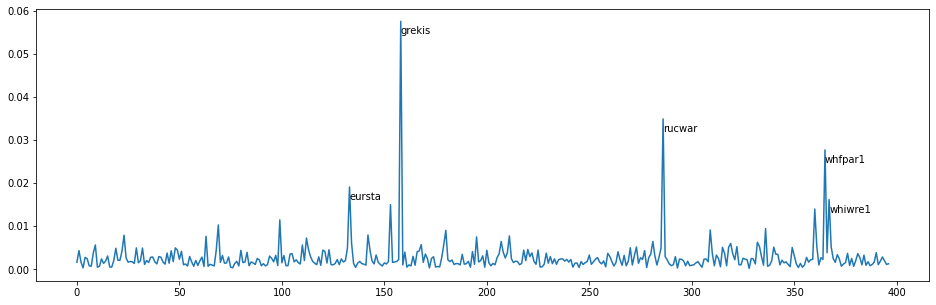

In [51]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [52]:
top5_birds

['eursta', 'grekis', 'rucwar', 'whfpar1', 'whiwre1']

## audio_id: 26709

In [53]:
idx = valid_df[valid_df["audio_id"] == 26709].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label", "birdcall_p"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,birdcall_p
1440,26709_SSW_5,5,amegfi,nocall,nocall,amegfi,houwre,reevir1,0.630631
1441,26709_SSW_10,10,nocall,nocall,nocall,haiwoo,comrav,mallar3,0.078197
1442,26709_SSW_15,15,nocall,nocall,nocall,comrav,daejun,mallar3,0.123547
1443,26709_SSW_20,20,nocall,nocall,nocall,redcro,comrav,barswa,0.142551
1444,26709_SSW_25,25,nocall,nocall,nocall,mallar3,whimbr,comrav,0.049857
1445,26709_SSW_30,30,nocall,nocall,nocall,btywar,macwar,daejun,0.908195
1446,26709_SSW_35,35,nocall,nocall,nocall,grhowl,whimbr,bcnher,0.958917
1447,26709_SSW_40,40,nocall,nocall,nocall,cangoo,mallar3,whimbr,0.979407
1448,26709_SSW_45,45,nocall,nocall,nocall,cangoo,mallar3,whimbr,0.991479
1449,26709_SSW_50,50,nocall,nocall,nocall,mallar3,bcnher,cubthr,0.248657


In [54]:
np.max(oof[1514, :])

0.12782021135919625

In [55]:
len(df[df["birds"] == "nocall"])

62

In [56]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.13055555555555554

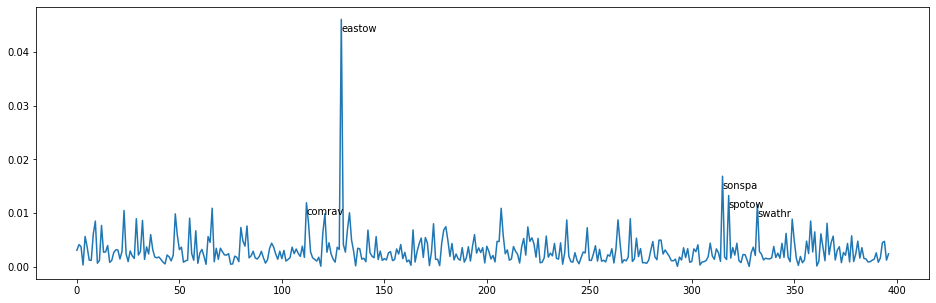

In [57]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [58]:
top5_birds

['comrav', 'eastow', 'sonspa', 'spotow', 'swathr']

## audio_id: 26746

In [59]:
idx = valid_df[valid_df["audio_id"] == 26746].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label", "birdcall_p"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,birdcall_p
360,26746_COR_5,5,bobfly1,bobfly1,bobfly1,bobfly1,whtdov,grtgra,0.999987
361,26746_COR_10,10,bobfly1,bobfly1,bobfly1,bobfly1,ocbfly1,cobtan1,0.999849
362,26746_COR_15,15,bobfly1,bobfly1,bobfly1,bobfly1,whbman1,norfli,0.999764
363,26746_COR_20,20,nocall,nocall,nocall,rucwar,cinfly2,barswa,0.956253
364,26746_COR_25,25,nocall,nocall,nocall,whbman1,cinfly2,houwre,0.999245
365,26746_COR_30,30,bobfly1,bobfly1,bobfly1,bobfly1,rubpep1,grekis,0.999991
366,26746_COR_35,35,bobfly1,nocall,bobfly1,bobfly1,norfli,grtgra,0.999959
367,26746_COR_40,40,bobfly1 rucwar,nocall,nocall,rucwar,bobfly1,whbman1,0.999930
368,26746_COR_45,45,rucwar,nocall,bobfly1,bobfly1,carwre,wbwwre1,0.999882
369,26746_COR_50,50,rucwar,nocall,nocall,rucwar,gcrwar,comrav,0.999934


In [60]:
np.max(oof[1514, :])

0.12782021135919625

In [61]:
len(df[df["birds"] == "nocall"])

71

In [62]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.175

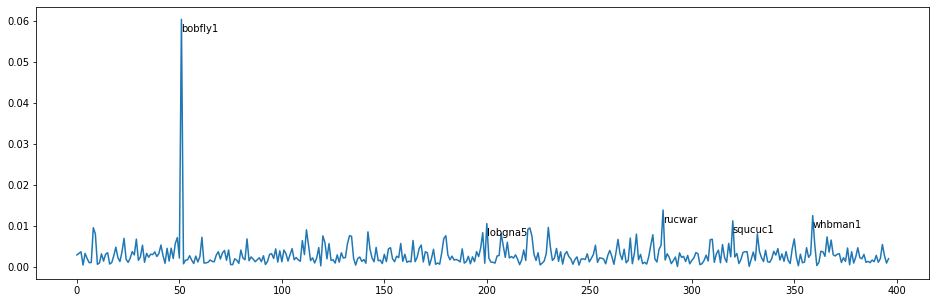

In [63]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [64]:
top5_birds

['bobfly1', 'lobgna5', 'rucwar', 'squcuc1', 'whbman1']

## audio_id: 28933

In [65]:
idx = valid_df[valid_df["audio_id"] == 28933].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label", "birdcall_p"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,birdcall_p
1560,28933_SSW_5,5,sonspa,nocall,nocall,sonspa,redcro,whtspa,0.992195
1561,28933_SSW_10,10,rewbla,nocall,nocall,sonspa,carchi,brncre,0.999893
1562,28933_SSW_15,15,sonspa,nocall,nocall,sonspa,eursta,barswa,0.982426
1563,28933_SSW_20,20,sonspa,nocall,nocall,obnthr1,houspa,barswa,0.972081
1564,28933_SSW_25,25,sonspa,nocall,nocall,eursta,shicow,bnhcow,0.999655
1565,28933_SSW_30,30,sonspa,nocall,nocall,marwre,bewwre,redcro,0.986380
1566,28933_SSW_35,35,sonspa,nocall,nocall,sonspa,eursta,houspa,0.415878
1567,28933_SSW_40,40,sonspa,nocall,nocall,barswa,rewbla,eursta,0.999983
1568,28933_SSW_45,45,sonspa,nocall,nocall,leafly,barswa,redcro,0.883064
1569,28933_SSW_50,50,sonspa,sonspa,sonspa,sonspa,foxspa,linspa,0.973487


In [66]:
np.max(oof[1514, :])

0.12782021135919625

In [67]:
len(df[df["birds"] == "nocall"])

18

In [68]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.48749999999999993

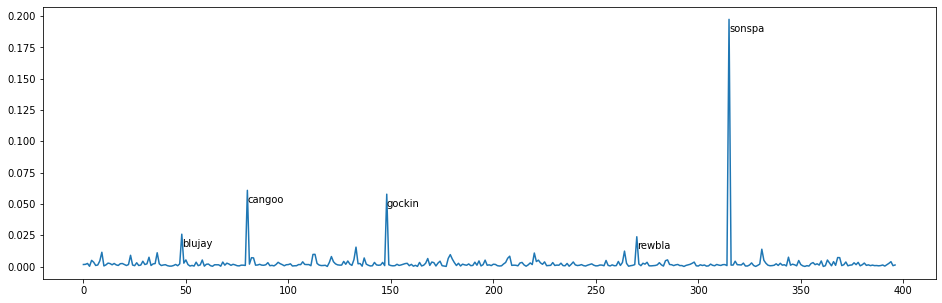

In [69]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [70]:
top5_birds

['blujay', 'cangoo', 'gockin', 'rewbla', 'sonspa']

## audio_id: 31928

In [71]:
idx = valid_df[valid_df["audio_id"] == 31928].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label", "birdcall_p"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,birdcall_p
480,31928_COR_5,5,nocall,nocall,nocall,compot1,grhowl,mallar3,0.145098
481,31928_COR_10,10,nocall,nocall,nocall,mallar3,comrav,bcnher,0.135015
482,31928_COR_15,15,nocall,nocall,nocall,wilsni1,greyel,whimbr,0.999996
483,31928_COR_20,20,nocall,nocall,nocall,wilsni1,greyel,mallar3,1.000000
484,31928_COR_25,25,nocall,nocall,nocall,scbwre1,comrav,mallar3,0.036316
485,31928_COR_30,30,nocall,nocall,nocall,mallar3,whimbr,redcro,0.505340
486,31928_COR_35,35,nocall,nocall,nocall,compot1,compau,grethr1,0.999977
487,31928_COR_40,40,nocall,nocall,nocall,whiwre1,grethr1,comrav,0.999981
488,31928_COR_45,45,nocall,nocall,nocall,whiwre1,whimbr,compot1,0.999988
489,31928_COR_50,50,nocall,nocall,nocall,whimbr,mallar3,wilsni1,1.000000


In [72]:
np.max(oof[1514, :])

0.12782021135919625

In [73]:
len(df[df["birds"] == "nocall"])

120

In [74]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.0

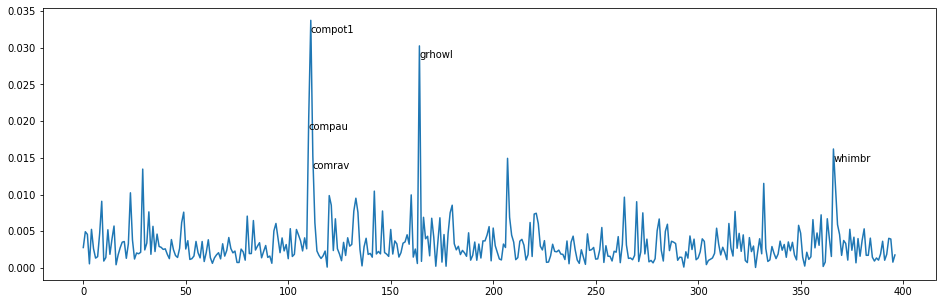

In [75]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [76]:
top5_birds

['compau', 'compot1', 'comrav', 'grhowl', 'whimbr']

## audio_id: 42907

In [77]:
idx = valid_df[valid_df["audio_id"] == 42907].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label", "birdcall_p"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,birdcall_p
1680,42907_SSW_5,5,reevir1,reevir1,reevir1,reevir1,ovenbi1,gbwwre1,1.000000
1681,42907_SSW_10,10,reevir1,nocall,nocall,moudov,rocpig,rugdov,0.999998
1682,42907_SSW_15,15,reevir1,nocall,nocall,eursta,eucdov,reevir1,0.999990
1683,42907_SSW_20,20,reevir1,nocall,nocall,reevir1,eursta,ovenbi1,0.999988
1684,42907_SSW_25,25,reevir1,nocall,nocall,reevir1,moudov,eucdov,0.999999
1685,42907_SSW_30,30,reevir1,nocall,nocall,reevir1,gbwwre1,blhpar1,1.000000
1686,42907_SSW_35,35,reevir1,nocall,nocall,reevir1,eursta,blhpar1,0.999995
1687,42907_SSW_40,40,reevir1,nocall,nocall,scatan,reevir1,gbwwre1,1.000000
1688,42907_SSW_45,45,reevir1,nocall,nocall,reevir1,andsol1,gbwwre1,0.999999
1689,42907_SSW_50,50,reevir1,nocall,nocall,reevir1,ovenbi1,gbwwre1,1.000000


In [78]:
np.max(oof[1514, :])

0.12782021135919625

In [79]:
len(df[df["birds"] == "nocall"])

75

In [80]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.2583333333333333

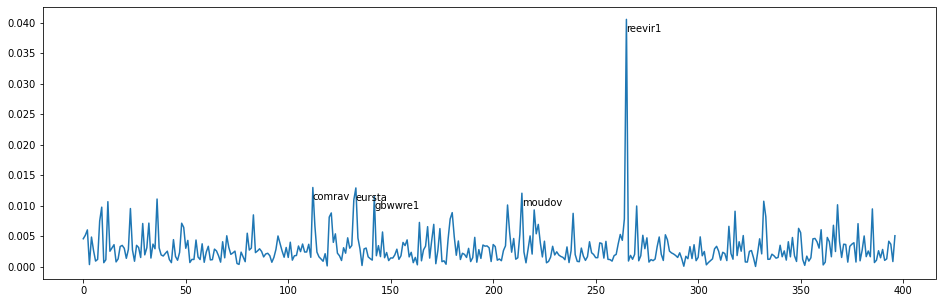

In [81]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [82]:
top5_birds

['comrav', 'eursta', 'gbwwre1', 'moudov', 'reevir1']

## audio_id: 44957

In [83]:
idx = valid_df[valid_df["audio_id"] == 44957].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label", "birdcall_p"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,birdcall_p
600,44957_COR_5,5,nocall,nocall,nocall,rudpig,ruboro1,comrav,0.283568
601,44957_COR_10,10,bobfly1,nocall,nocall,yetvir,bobfly1,blujay,0.999294
602,44957_COR_15,15,nocall,nocall,bobfly1,bobfly1,chbant1,eursta,0.999416
603,44957_COR_20,20,bobfly1,bobfly1,bobfly1,bobfly1,yehcar1,grekis,0.999925
604,44957_COR_25,25,bobfly1,bobfly1,bobfly1,bobfly1,yehcar1,eursta,0.999972
605,44957_COR_30,30,bobfly1,bobfly1,bobfly1,bobfly1,grekis,rewbla,0.999997
606,44957_COR_35,35,bobfly1,bobfly1,bobfly1,bobfly1,carwre,blujay,0.999999
607,44957_COR_40,40,bobfly1,bobfly1,bobfly1,bobfly1,grekis,bncfly,0.999992
608,44957_COR_45,45,bobfly1,bobfly1,bobfly1,bobfly1,rewbla,eucdov,0.999494
609,44957_COR_50,50,bobfly1,bobfly1,bobfly1,bobfly1,rewbla,carwre,0.999999


In [84]:
np.max(oof[1514, :])

0.12782021135919625

In [85]:
len(df[df["birds"] == "nocall"])

49

In [86]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.41111111111111165

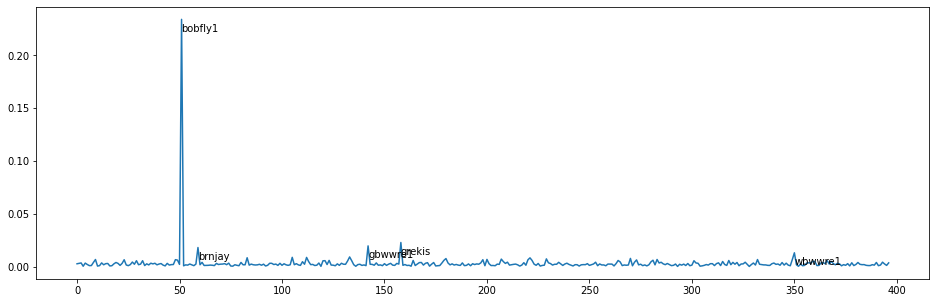

In [87]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [88]:
top5_birds

['bobfly1', 'brnjay', 'gbwwre1', 'grekis', 'wbwwre1']

## audio_id: 50878

In [89]:
idx = valid_df[valid_df["audio_id"] == 50878].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label", "birdcall_p"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,birdcall_p
720,50878_COR_5,5,nocall,nocall,nocall,pasfly,barswa,gwfgoo,0.993547
721,50878_COR_10,10,nocall,nocall,nocall,relpar,grhcha1,cubthr,0.997356
722,50878_COR_15,15,nocall,nocall,nocall,grhcha1,comrav,relpar,0.995950
723,50878_COR_20,20,nocall,nocall,nocall,grhcha1,relpar,gwfgoo,0.999980
724,50878_COR_25,25,nocall,nocall,nocall,grhcha1,relpar,wooduc,0.998677
725,50878_COR_30,30,nocall,nocall,nocall,relpar,wooduc,mallar3,0.998531
726,50878_COR_35,35,nocall,nocall,nocall,grhcha1,gwfgoo,smbani,0.999724
727,50878_COR_40,40,nocall,nocall,nocall,grhcha1,colcha1,bknsti,0.999823
728,50878_COR_45,45,nocall,nocall,nocall,grhcha1,relpar,colcha1,0.999729
729,50878_COR_50,50,nocall,nocall,nocall,relpar,grhcha1,comrav,0.995748


In [90]:
np.max(oof[1514, :])

0.12782021135919625

In [91]:
len(df[df["birds"] == "nocall"])

115

In [92]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.041666666666666664

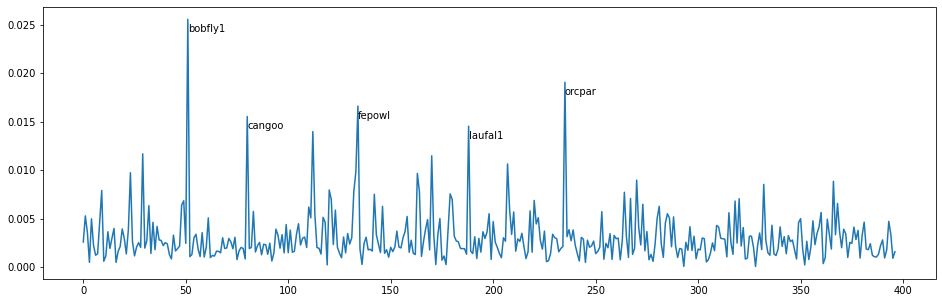

In [93]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [94]:
top5_birds

['bobfly1', 'cangoo', 'fepowl', 'laufal1', 'orcpar']

## audio_id: 51010

In [95]:
idx = valid_df[valid_df["audio_id"] == 51010].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label", "birdcall_p"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,birdcall_p
1800,51010_SSW_5,5,grycat norfli,nocall,nocall,norfli,norcar,grycat,0.980515
1801,51010_SSW_10,10,grycat norfli,nocall,grycat,grycat,warvir,stejay,0.999938
1802,51010_SSW_15,15,woothr,grycat,grycat,grycat,andsol1,woothr,0.999983
1803,51010_SSW_20,20,norfli,nocall,grycat,grycat,bulori,lesgol,0.999948
1804,51010_SSW_25,25,norfli,nocall,grycat,grycat,gbwwre1,norcar,0.999882
1805,51010_SSW_30,30,nocall,nocall,nocall,rewbla,grycat,blujay,0.999984
1806,51010_SSW_35,35,rewbla,nocall,nocall,blujay,balori,grycat,0.999975
1807,51010_SSW_40,40,nocall,nocall,nocall,blujay,grycat,norcar,0.999955
1808,51010_SSW_45,45,norfli,nocall,nocall,norcar,yeofly1,dowwoo,0.975927
1809,51010_SSW_50,50,norfli,nocall,nocall,gnwtea,cubthr,norcar,0.915260


In [96]:
np.max(oof[1514, :])

0.12782021135919625

In [97]:
len(df[df["birds"] == "nocall"])

28

In [98]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.37916666666666676

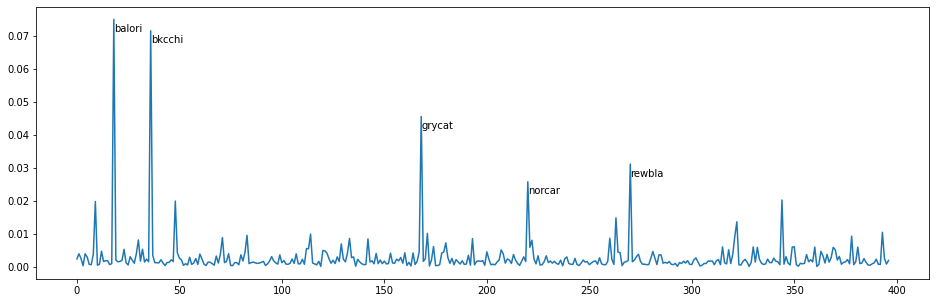

In [99]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [100]:
top5_birds

['balori', 'bkcchi', 'grycat', 'norcar', 'rewbla']

## audio_id: 54955

In [101]:
idx = valid_df[valid_df["audio_id"] == 54955].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label", "birdcall_p"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,birdcall_p
1920,54955_SSW_5,5,nocall,nocall,nocall,mallar3,blujay,grhowl,0.191209
1921,54955_SSW_10,10,nocall,nocall,nocall,mallar3,whimbr,blujay,0.164736
1922,54955_SSW_15,15,nocall,nocall,nocall,gwfgoo,mallar3,cangoo,0.546933
1923,54955_SSW_20,20,nocall,nocall,nocall,bcnher,mallar3,comrav,0.030422
1924,54955_SSW_25,25,nocall,nocall,nocall,grcfly,swathr,mallar3,0.054283
1925,54955_SSW_30,30,nocall,nocall,nocall,comrav,mallar3,whimbr,0.041958
1926,54955_SSW_35,35,nocall,nocall,nocall,whimbr,mallar3,bcnher,0.235971
1927,54955_SSW_40,40,nocall,nocall,nocall,mallar3,bcnher,gwfgoo,0.202667
1928,54955_SSW_45,45,nocall,nocall,nocall,mallar3,whimbr,bcnher,0.069299
1929,54955_SSW_50,50,nocall,nocall,nocall,mallar3,whimbr,gwfgoo,0.068573


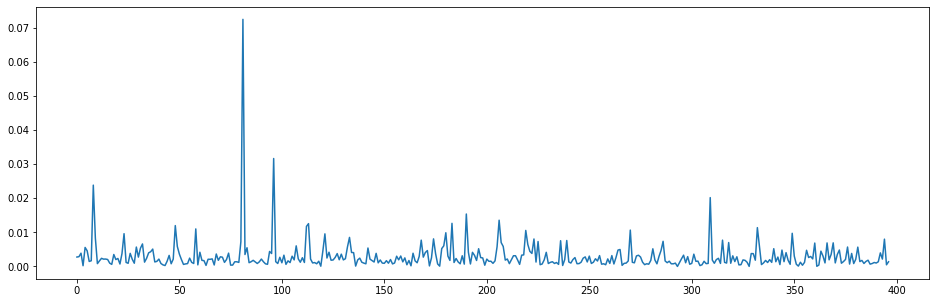

In [102]:
plt.figure(figsize=(16, 5))
plt.plot(oof[2036, :])

In [103]:
len(df[df["birds"] == "nocall"])

100

In [104]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.11388888888888887

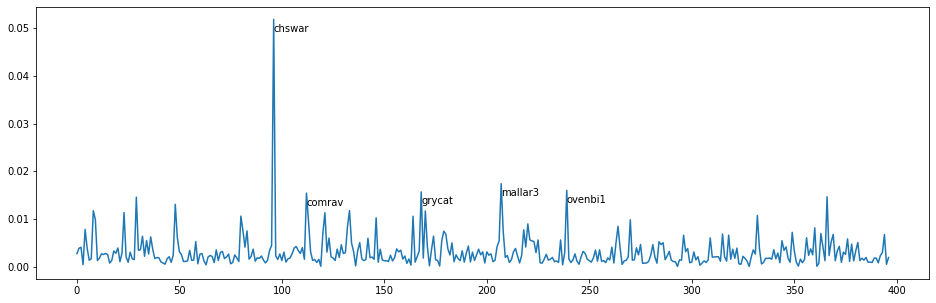

In [105]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [106]:
top5_birds

['chswar', 'comrav', 'grycat', 'mallar3', 'ovenbi1']

## audio_id: 57610

In [107]:
idx = valid_df[valid_df["audio_id"] == 57610].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label", "birdcall_p"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,birdcall_p
840,57610_COR_5,5,nocall,nocall,nocall,orbspa1,banana,comrav,0.999843
841,57610_COR_10,10,nocall,nocall,nocall,orbspa1,banana,gockin,0.999994
842,57610_COR_15,15,nocall,nocall,nocall,meapar,baywre1,littin1,0.999768
843,57610_COR_20,20,rubwre1,rubwre1,rubwre1,rubwre1,wbwwre1,baywre1,1.000000
844,57610_COR_25,25,rubwre1,rubwre1,rubwre1,rubwre1,wbwwre1,baywre1,1.000000
845,57610_COR_30,30,nocall,nocall,nocall,meapar,comrav,mallar3,0.999383
846,57610_COR_35,35,nocall,nocall,nocall,mallar3,comrav,littin1,0.984721
847,57610_COR_40,40,rubwre1,nocall,nocall,wbwwre1,butsal1,burwar1,0.994006
848,57610_COR_45,45,rubwre1,nocall,nocall,rubwre1,wbwwre1,gbwwre1,0.999955
849,57610_COR_50,50,nocall,nocall,nocall,banana,orbspa1,comrav,0.999855


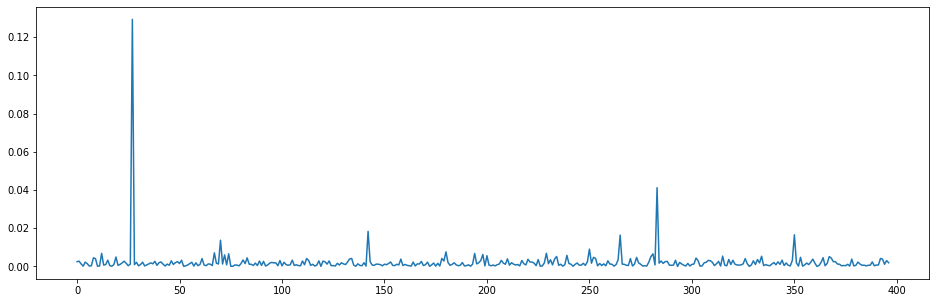

In [108]:
plot_oof(861)

In [109]:
np.max(oof[1514, :])

0.12782021135919625

In [110]:
len(df[df["birds"] == "nocall"])

93

In [111]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.17777777777777776

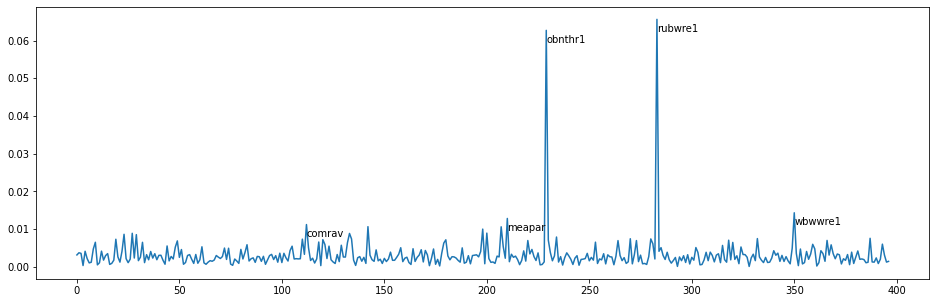

In [112]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [113]:
top5_birds

['comrav', 'meapar', 'obnthr1', 'rubwre1', 'wbwwre1']

In [114]:
valid_df["div"] = np.max(oof, axis=1) / np.sort(oof, axis=1)[:, -2]

In [115]:
valid_df[valid_df["birds"] == "nocall"].sort_values(by="div").tail(100)

,row_id,site,audio_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,nocall_birds,nocall_oof_birds,acc,diff,diff_pattern,birdcall_p,div
93,11254_COR_470,COR,11254,470,nocall,nocall,nocall,meapar,mallar3,comrav,1,1,True,0,birdX -> birdY,0.988022,4.070798
549,31928_COR_350,COR,31928,350,nocall,nocall,nocall,grhowl,compot1,comrav,1,1,True,0,birdX -> birdY,0.828099,4.106325
1469,26709_SSW_150,SSW,26709,150,nocall,nocall,nocall,btywar,canwar,ovenbi1,1,1,True,0,birdX -> birdY,0.117095,4.157668
636,44957_COR_185,COR,44957,185,nocall,nocall,nocall,obnthr1,wbwwre1,butsal1,1,1,True,0,birdX -> birdY,0.999983,4.162471
215,18003_COR_480,COR,18003,480,nocall,nocall,nocall,eursta,ducfly,reshaw,1,1,True,0,birdX -> birdY,1.000000,4.169524
1310,10534_SSW_555,SSW,10534,555,nocall,nocall,rewbla,rewbla,comrav,blujay,1,1,True,0,birdX -> birdY,0.989770,4.182758
803,50878_COR_420,COR,50878,420,nocall,nocall,nocall,fepowl,compau,comrav,1,1,True,0,birdX -> birdY,0.636078,4.215648
1931,54955_SSW_60,SSW,54955,60,nocall,nocall,nocall,grhowl,mallar3,bcnher,1,1,True,0,birdX -> birdY,0.036144,4.258316
739,50878_COR_100,COR,50878,100,nocall,nocall,nocall,grhcha1,relpar,azaspi1,1,1,True,0,birdX -> birdY,0.998143,4.264883
1095,7843_SSW_80,SSW,7843,80,nocall,nocall,nocall,sancra,comrav,whimbr,1,1,True,0,birdX -> birdY,0.220800,4.270572


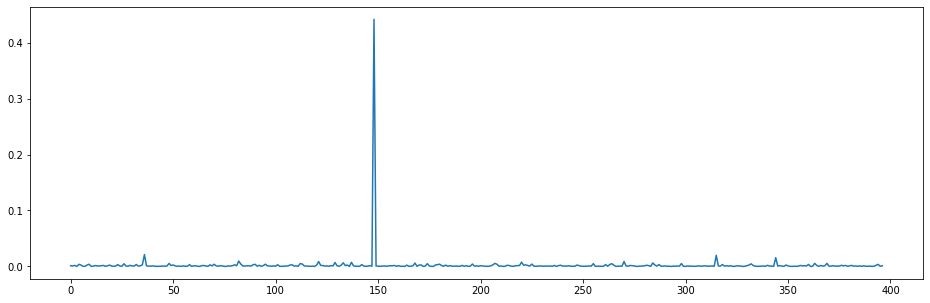

In [116]:
plot_oof(1626)

In [130]:
train_df = pd.read_csv("../data/input/train_metadata.csv")

valid_birds = []
for birds in valid_df["birds"]:
    valid_birds += birds.split(" ")
valid_birds = list(set(valid_birds))

for bird in train_df["primary_label"].unique():
    if bird in valid_birds:
        sample_num = len(train_df[train_df["primary_label"] == bird])
        print(f"【{bird}】   sample:{sample_num}")

        bird_df = valid_df[valid_df["birds"].str.contains(bird)].reset_index(drop=True)
        bird_df["acc"] = True
        true_idx = bird_df[bird_df["oof_birds"] != bird].index
        bird_df.loc[true_idx, "acc"] = False

        print(bird_df["acc"].value_counts().sort_index())
        print("\n" * 3)

【amecro】   sample:229
False    1
Name: acc, dtype: int64




【amegfi】   sample:181
False    5
True     1
Name: acc, dtype: int64




【amerob】   sample:481
False    7
Name: acc, dtype: int64




【balori】   sample:155
False    28
True     12
Name: acc, dtype: int64




【belkin1】   sample:77
False    1
True     2
Name: acc, dtype: int64




【bkcchi】   sample:272
False    47
True     20
Name: acc, dtype: int64




【blujay】   sample:328
False    5
True     7
Name: acc, dtype: int64




【bobfly1】   sample:236
False    40
True     50
Name: acc, dtype: int64




【brnjay】   sample:66
False    3
True     4
Name: acc, dtype: int64




【bucmot2】   sample:38
False    4
Name: acc, dtype: int64




【cangoo】   sample:265
False    11
True      7
Name: acc, dtype: int64




【chswar】   sample:148
False    7
True     9
Name: acc, dtype: int64




【clcrob】   sample:195
False    3
True     1
Name: acc, dtype: int64




【comgra】   sample:128
False    3
Name: acc, dtype: int64




【comyel】   sample:398
False 